# Preprocessing

In [1]:
file_path = r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\POI\UniPerugia_POI.csv'
with open(file_path, 'r') as file:
    poi = file.readlines()

print(poi)

['id;name;description;id_openstreetmap;nome;descrizione;latitude;longitude\n', "1;Villalba Park;the villalba park is a wooded area of over 20 ha the park is situated at an altitude between 600 and 700 meters and it was designed by the mountain communities as park facilities the area situated at the edge of the monte rufeno nature reserve inside the vast state owned forest of selva di meana is remarkable from an environmental point of view the park is included in the ample interregional park the woods of tall trees include species of oak with some other rarer but important varieties such as maple ash beech and chestnut trees among the shrubs there are the rare fraxinella ;2959161;Parco di Villalba;Area boschiva di oltre 20 ha. situata ad un'altitudine fra i 600 ed i 700 metri e destinata dalla ComunitA  Montana a parco attrezzato.;4282034852;1190938726\n", '2;Prati di Stroncone;a dreamlike destination about 1000 metres above sea level near stroncone a medieval village perched on a hill 

In [2]:
import pandas as pd

# Carica il file CSV
df = pd.read_csv(file_path, sep=';')

# Seleziona solo le colonne 'nome' e 'descrizione' in italiano
df_italiano = df[['id', 'latitude', 'longitude', 'nome', 'descrizione']]

file_save = r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\POI\UniPerugia_POI_italiano.csv'
# Salva il dataframe con le sole colonne italiane in un nuovo file CSV
df_italiano.to_csv(file_save, index=False)

In [3]:
df_italiano

,id,latitude,longitude,nome,descrizione
0,1,4282034852,1.190939e+09,Parco di Villalba,Area boschiva di oltre 20 ha. situata ad un'al...
1,2,4248227358,1.271752e+08,I Prati di Stroncone,"Vicino a Stroncone, borgo medievale arroccato ..."
2,4,4252461751,1.251083e+09,Le Gole del Nera,"Le Gole del Nera, dove la natura, la cultura e..."
3,5,4311391797,1.213872e+08,Rocca di Isola Polvese,"La rocca si trova nell'isola Polvese che, insi..."
4,6,4317706039,1.208824e+09,Isola Maggiore,"LaIsola Maggiore A"" la seconda per grandezza d..."
...,...,...,...,...,...
570,620,4282041305,1.277660e+09,LA TORRE di Sol LeWitt a Campello sul Clitunno,"Unaopera d'arte ""ziggurart""di uno dei numerosi..."
571,621,4295343173,1.270478e+09,"CIAC, Centro Italiano Arte Contemporanea","Uno spazio espositivo, punto di arrivo della c..."
572,622,4272881718,1.259773e+09,Il borgo fantasma di Scoppio,Descrizione mancante
573,623,4250498859,1.246919e+09,Castello di Montoro,Un antico castello immerso in un bosco millenario


## Preparo il dataset al preprocessing

In [4]:
descriptions = df_italiano['descrizione'].replace('\n', '')
print(descriptions)

0      Area boschiva di oltre 20 ha. situata ad un'al...
1      Vicino a Stroncone, borgo medievale arroccato ...
2      Le Gole del Nera, dove la natura, la cultura e...
3      La rocca si trova nell'isola Polvese che, insi...
4      LaIsola Maggiore A" la seconda per grandezza d...
                             ...                        
570    Unaopera d'arte "ziggurart"di uno dei numerosi...
571    Uno spazio espositivo, punto di arrivo della c...
572                                 Descrizione mancante
573    Un antico castello immerso in un bosco millenario
574                                 Descrizione mancante
Name: descrizione, Length: 575, dtype: object


In [5]:
file_corpus = r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\my_corpus_folder\my_corpus.txt'
with open(file_corpus, 'w') as f:
    for description in descriptions:
        if isinstance(description, str):
            description = description.replace('\n', ' ')
            f.write(description + '\n')

### Rimozione di stopwords in italiano

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('italian'))
stopwords_list = stopwords.words('italian')

In [8]:
type(stopwords_list)

list

Aggiungo alla lista di stopwords le parole che contengono più di due lettere uguali consecutive:

In [9]:
# carica il corpus
# Apre il file di testo in modalità di lettura ('r')
with open(r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\my_corpus_folder\my_corpus.txt', 'r') as file:
    # Legge il contenuto del file e lo memorizza in una variabile
    corpus = file.read()

# Stampa il contenuto del file
print(corpus)

Area boschiva di oltre 20 ha. situata ad un'altitudine fra i 600 ed i 700 metri e destinata dalla ComunitA  Montana a parco attrezzato.
Vicino a Stroncone, borgo medievale arroccato su un colle ricoperto di uliveti e gelosamente protetto dalle solide mura castellane, si cela un vero e proprio luogo da sogno, a circa mille metri di altitudine.
Le Gole del Nera, dove la natura, la cultura e la storia si incontrano da oltre duemila anni in un'atmosfera unica, sono una degna prosecuzione della Valnerina dopo l'attraversamento della Conca Ternana del fiume Nera.
La rocca si trova nell'isola Polvese che, insieme all'isola Maggiore e alla Minore, occupa il bacino del Lago Trasimeno.
LaIsola Maggiore A" la seconda per grandezza del lago Trasimeno e si presenta ricoperta da una fitta vegetazione di olivi, lecci e cipressi. A differenza dellaIsola Polvese e della Minore A" ancora oggi urbanizzata; presenta infatti un piccolo villaggio sulla riva occidentale.
Per raggiungere il santuario della Ma

In [12]:
corpus = list(corpus.split())

In [13]:
corpus

['Area',
 'boschiva',
 'di',
 'oltre',
 '20',
 'ha.',
 'situata',
 'ad',
 "un'altitudine",
 'fra',
 'i',
 '600',
 'ed',
 'i',
 '700',
 'metri',
 'e',
 'destinata',
 'dalla',
 'ComunitA',
 'Montana',
 'a',
 'parco',
 'attrezzato.',
 'Vicino',
 'a',
 'Stroncone,',
 'borgo',
 'medievale',
 'arroccato',
 'su',
 'un',
 'colle',
 'ricoperto',
 'di',
 'uliveti',
 'e',
 'gelosamente',
 'protetto',
 'dalle',
 'solide',
 'mura',
 'castellane,',
 'si',
 'cela',
 'un',
 'vero',
 'e',
 'proprio',
 'luogo',
 'da',
 'sogno,',
 'a',
 'circa',
 'mille',
 'metri',
 'di',
 'altitudine.',
 'Le',
 'Gole',
 'del',
 'Nera,',
 'dove',
 'la',
 'natura,',
 'la',
 'cultura',
 'e',
 'la',
 'storia',
 'si',
 'incontrano',
 'da',
 'oltre',
 'duemila',
 'anni',
 'in',
 "un'atmosfera",
 'unica,',
 'sono',
 'una',
 'degna',
 'prosecuzione',
 'della',
 'Valnerina',
 'dopo',
 "l'attraversamento",
 'della',
 'Conca',
 'Ternana',
 'del',
 'fiume',
 'Nera.',
 'La',
 'rocca',
 'si',
 'trova',
 "nell'isola",
 'Polvese',
 'ch

In [73]:
import re
import nltk
from nltk.corpus import stopwords

print(len(stopwords_list))

# Funzione per identificare le parole con più di due caratteri uguali vicini
def contains_repeated_characters(word):
    return re.search(r'(.)\1{2,}', word) is not None

words_with_repeated_characters = []
# Estrai le parole con più di due caratteri uguali vicini dal corpus
for word in corpus:
    if(contains_repeated_characters(word)):
        word = word.lower()
        stopwords_list.append(word)
        words_with_repeated_characters.append(word)

print(len(words_with_repeated_characters))

print(words_with_repeated_characters)
# Estendi la lista di stopwords italiane con le parole con più di due caratteri uguali vicini

# Stampa la lista di stopwords aggiornata
print("Lista di stopwords italiane aggiornata:")
print(stopwords_list)

print(len(stopwords_list))

stopwords_list.append("train")


320
41
['...e', 'xiii', '(xiii-xiv', 'xviii', "all'viii", 'xiii', 'xiii', 'xviii', 'viii', 'xiii', 'xiii', 'xviii', 'xiii-xiv,', 'viii', 'xiii', '2000', 'xiii', 'iii', 'xiii', 'xiii', 'xiii', 'xiii', 'xiii', 'xiii', 'iii', '1000', 'xiii', 'xiii-', 'xiii.', 'xiii', 'xiii', 'iii,', 'iii,', '2000.', 'aaaaaaacastello', 'xiii', 'xiii', 'xiii', 'perugia...', '1999', 'abitato...']
Lista di stopwords italiane aggiornata:
['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 

## Preprocessing automatico di OCTIS

Questo pezzo di codice definisce una classe MyDataset che eredita dalla classe Dataset fornita da Octis. La classe Dataset è una classe base per la gestione dei dataset all'interno di Octis.

All'interno della classe MyDataset, viene definito un metodo speciale __init__ che viene chiamato quando si crea un nuovo oggetto MyDataset. Questo metodo accetta un argomento data_folder, che presumibilmente è il percorso della cartella contenente il corpus di testo.

Il metodo _load_dataset viene definito per caricare il dataset. All'interno di questo metodo, il contenuto del file di corpus all'interno della cartella specificata viene letto e suddiviso in righe (documenti) che vengono memorizzati in una lista chiamata documents.

Quindi, quando viene creato un oggetto MyDataset, il metodo _load_dataset viene chiamato implicitamente per caricare il dataset, e il dataset viene restituito sotto forma di lista di documenti.

Infine, viene creato un oggetto MyDataset passando il percorso della cartella contenente il corpus di testo come argomento.

In [74]:
from octis.dataset.dataset import Dataset

class MyDataset(Dataset):
    def __init__(self, data_folder):
        super(MyDataset, self).__init__(data_folder)

    def _load_dataset(self):
        with open(self.data_folder, 'r') as f:
            # leggi il file di corpus e crea una lista di documenti
            documents = f.read().splitlines()
        # restituisci la lista di documenti come dataset
        return documents

In [75]:
my_corpus_folder = r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\my_corpus_folder'
dataset = MyDataset(my_corpus_folder)

In [76]:
dataset.get_corpus()

'C:\\Users\\franc\\Desktop\\PROJECTS\\PROJECTS\\RASTA\\my_corpus_folder'

In [77]:
import os
import string
from octis.preprocessing.preprocessing import Preprocessing

In [78]:
dataset_path = r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\dataset'
dataset_save = dataset_path

In [79]:
stopwords_list

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [80]:
import json

# Salvataggio della lista in un file JSON
with open(r"C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\dataset\lista_stopwords.json", "w") as file:
    json.dump(stopwords_list, file)

# Caricamento della lista da un file JSON
with open(r"C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\dataset\lista_stopwords.json", "r") as file:
    lista_caricata = json.load(file)

In [81]:
type(lista_caricata)

list

In [82]:
# Initialize preprocessing
preprocessor = Preprocessing(vocabulary=None, max_features=None,
                             remove_punctuation=True, punctuation=string.punctuation,
                             lemmatize=True, stopword_list=lista_caricata, language="italian", split=False,
                             min_chars=3, min_words_docs=0)
# preprocess
dataset = preprocessor.preprocess_dataset(file_corpus)

100%|██████████| 573/573 [00:13<00:00, 43.37it/s]

created vocab
2755



c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:394: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abitato', 'perugia', 'xiii-xiv'] not in stop_words.
  warnings.warn(


In [83]:
# save the preprocessed dataset
dataset.save(dataset_save)

In [84]:
print(len(dataset.get_corpus()))   # numero di POI 

573


## Legge di Zipf

In [85]:
# Importo le librerie necessarie:
import matplotlib.pyplot as plt
import nltk

In [134]:
# Carico il mio dataset:
with open(r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\dataset\corpus.tsv', 'r') as file:
  testo = file.read()

In [154]:
testo = testo.split()

for i in testo:
    if(i == 'train'):
        testo.remove(i)

AttributeError: 'list' object has no attribute 'split'

In [136]:
testo

['area',
 'boschivo',
 'oltre',
 'avere',
 'situare',
 'altitudine',
 'fra',
 'metro',
 'destinare',
 'comunito',
 'parco',
 'attrezzato',
 'vicino',
 'stroncone',
 'borgo',
 'medievale',
 'arroccare',
 'colle',
 'ricoperto',
 'uliveto',
 'gelosamente',
 'protetto',
 'solido',
 'muro',
 'castellano',
 'celare',
 'vero',
 'proprio',
 'luogo',
 'sogno',
 'circa',
 'mille',
 'metro',
 'altitudine',
 'gola',
 'nera',
 'natura',
 'cultura',
 'storia',
 'incontrare',
 'oltre',
 'duemila',
 'anno',
 'atmosfera',
 'unico',
 'essere',
 'degno',
 'prosecuzione',
 'valnerina',
 'dopo',
 'attraversamento',
 'conca',
 'ternano',
 'fiume',
 'nero',
 'rocca',
 'trovare',
 'isola',
 'polvese',
 'insieme',
 'isola',
 'maggiore',
 'minore',
 'occupare',
 'bacino',
 'lago',
 'trasimeno',
 'laisolare',
 'maggiore',
 'secondo',
 'grandezza',
 'lago',
 'trasimeno',
 'presentare',
 'ricoprire',
 'fitto',
 'vegetazione',
 'olivo',
 'leccio',
 'cipresso',
 'differenza',
 'dellaisolo',
 'polvese',
 'minore',
 '

In [137]:
len(testo) # 7990

7990

In [138]:
# Calcolo la frequenza delle parole:
word_frequency = nltk.FreqDist(testo)

In [139]:
word_frequency

FreqDist({'chiesa': 156, 'trovare': 96, 'essere': 92, 'secolo': 79, 'centro': 78, 'piazza': 63, 'citta': 62, 'pia': 59, 'antico': 59, 'borgo': 53, ...})

In [140]:
word_frequency.values()

dict_values([12, 1, 4, 38, 34, 5, 9, 7, 1, 2, 16, 1, 17, 4, 53, 35, 3, 22, 1, 1, 1, 2, 1, 25, 3, 1, 7, 8, 25, 1, 19, 5, 5, 4, 7, 8, 23, 2, 1, 17, 2, 12, 92, 1, 1, 9, 13, 1, 1, 2, 11, 8, 14, 96, 5, 3, 7, 16, 6, 6, 4, 15, 14, 1, 21, 1, 8, 3, 4, 5, 5, 2, 1, 1, 1, 9, 18, 1, 4, 38, 2, 4, 4, 4, 18, 4, 1, 1, 6, 1, 8, 3, 3, 7, 5, 9, 7, 3, 4, 11, 50, 1, 25, 50, 11, 10, 27, 1, 1, 12, 14, 5, 6, 2, 20, 20, 25, 52, 7, 16, 13, 9, 2, 7, 19, 3, 36, 6, 20, 4, 5, 5, 4, 26, 1, 1, 4, 3, 18, 2, 1, 1, 10, 1, 8, 15, 79, 16, 9, 2, 11, 1, 4, 59, 1, 4, 2, 156, 18, 3, 3, 31, 9, 2, 45, 2, 50, 19, 1, 35, 3, 3, 5, 1, 2, 2, 78, 1, 1, 6, 8, 9, 1, 2, 2, 2, 2, 1, 1, 8, 2, 1, 2, 5, 6, 3, 1, 1, 2, 2, 6, 5, 4, 1, 4, 1, 1, 1, 2, 2, 16, 2, 1, 3, 2, 15, 18, 10, 1, 1, 2, 1, 1, 2, 34, 1, 1, 1, 1, 10, 3, 3, 1, 7, 5, 2, 5, 1, 2, 11, 1, 5, 5, 1, 7, 8, 2, 1, 1, 5, 3, 3, 1, 6, 4, 2, 3, 1, 2, 1, 3, 2, 11, 3, 3, 4, 2, 3, 9, 1, 2, 1, 1, 2, 3, 4, 1, 9, 1, 6, 7, 5, 10, 5, 17, 11, 5, 1, 3, 33, 1, 8, 11, 1, 4, 4, 11, 1, 6, 1, 3, 6, 4, 9, 

In [141]:
my_dict = {}
for i in word_frequency:
  my_dict[i] = word_frequency[i] 

numero_elementi = len(my_dict)
print(numero_elementi)

2713


In [142]:
# salvo su file excel
import pandas as pd

# Creazione di un DataFrame da un dizionario
df = pd.DataFrame(list(my_dict.items()), columns=['Parola', 'Frequenza'])

df.to_excel('frequenza_parole.xlsx', index=False)

In [143]:
# Prepara i dati per il grafico
words = list(word_frequency.keys())
frequency = list(word_frequency.values())

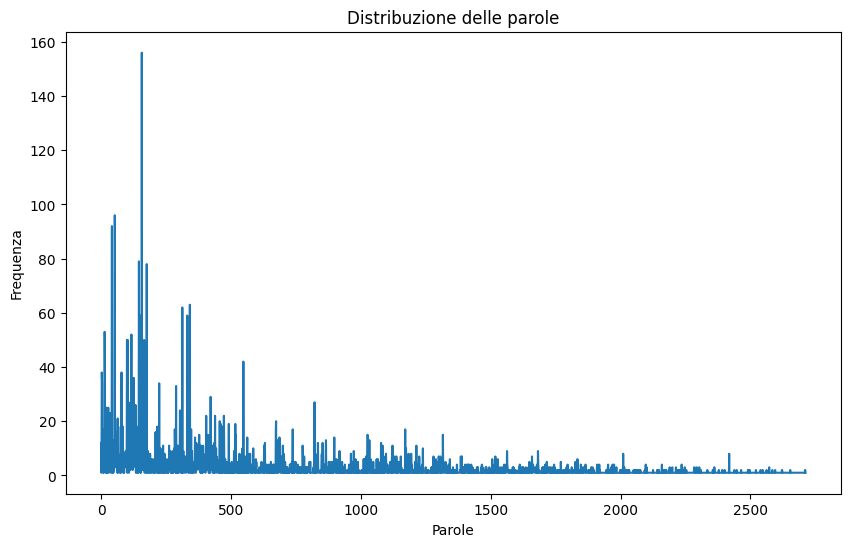

In [144]:
# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(range(len(words)), frequency)
#plt.xticks(range(len(words)))
plt.xlabel('Parole')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle parole')
plt.show()

In [145]:
print(df.head(30))

       Parola  Frequenza
0      chiesa        156
1     trovare         96
2      essere         92
3      secolo         79
4      centro         78
5      piazza         63
6       citta         62
7         pia         59
8      antico         59
9       borgo         53
10    sorgere         52
11   castello         50
12    storico         50
13    palazzo         50
14      museo         45
15  costruire         42
16      avere         38
17    piccolo         38
18        via         36
19  medievale         35
20    interno         35
21    situare         34
22      lungo         34
23    perugia         33
24       poco         31
25     comune         29
26      monte         27
27      santo         27
28       arte         26
29       muro         25


In [146]:
print(df.tail(30))

              Parola  Frequenza
2683           brajo          1
2684            fuso          1
2685         vacanze          1
2686   coloratissimo          1
2687           laala          1
2688          priore          1
2689    corporazione          1
2690      cambiatore          1
2691          moneta          1
2692      parrocchia          1
2693        pupaggio          1
2694       incantato          1
2695        indietro          1
2696        paradiso          1
2697  dellaarcadiare          1
2698        perugina          1
2699           servo          1
2700         chimico          1
2701       diventare          1
2702         nellaxi          1
2703         giunone          1
2704           vesta          1
2705          quindi          1
2706      tramandare          1
2707       ziggurart          1
2708  internazionale          1
2709             ina          1
2710          arrivo          1
2711       crescente          1
2712      millenario          1


In [147]:
values = list(word_frequency.values())

parole_piu_frequenti = list(my_dict.keys())
parole_piu_frequenti = parole_piu_frequenti[0:30]

y = list(my_dict.values())
y = y[0:30]

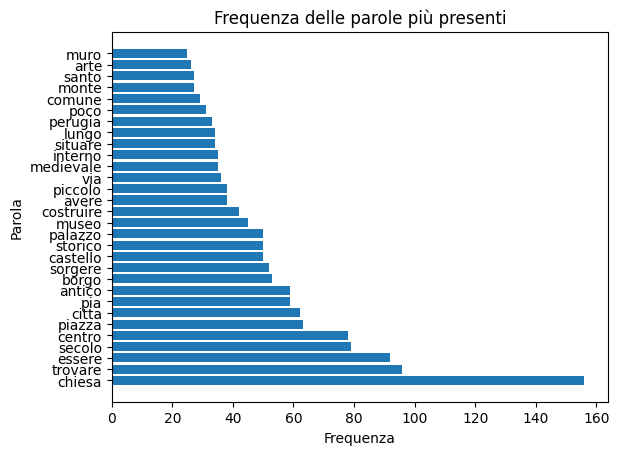

In [148]:
import matplotlib.pyplot as plt

plt.barh(parole_piu_frequenti, y)
plt.xlabel('Frequenza')
plt.ylabel('Parola')
plt.title('Frequenza delle parole più presenti')
plt.show()

In [149]:
file_corpus = r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\my_corpus_folder\my_corpus.txt'
with open(file_corpus, 'w') as f:
    for description in descriptions:
        if isinstance(description, str):
            description = description.replace('\n', ' ')
            f.write(description + '\n')

In [150]:
with open(r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\my_corpus_folder\my_corpus.txt', 'r') as file:
    # Legge il contenuto del file e lo memorizza in una variabile
    corpus = file.read()

# Stampa il contenuto del file
print(corpus)

Area boschiva di oltre 20 ha. situata ad un'altitudine fra i 600 ed i 700 metri e destinata dalla ComunitA  Montana a parco attrezzato.
Vicino a Stroncone, borgo medievale arroccato su un colle ricoperto di uliveti e gelosamente protetto dalle solide mura castellane, si cela un vero e proprio luogo da sogno, a circa mille metri di altitudine.
Le Gole del Nera, dove la natura, la cultura e la storia si incontrano da oltre duemila anni in un'atmosfera unica, sono una degna prosecuzione della Valnerina dopo l'attraversamento della Conca Ternana del fiume Nera.
La rocca si trova nell'isola Polvese che, insieme all'isola Maggiore e alla Minore, occupa il bacino del Lago Trasimeno.
LaIsola Maggiore A" la seconda per grandezza del lago Trasimeno e si presenta ricoperta da una fitta vegetazione di olivi, lecci e cipressi. A differenza dellaIsola Polvese e della Minore A" ancora oggi urbanizzata; presenta infatti un piccolo villaggio sulla riva occidentale.
Per raggiungere il santuario della Ma

In [151]:
corpus = list(corpus.split())

In [152]:
import re
import nltk
from nltk.corpus import stopwords

print(len(stopwords_list))

# Funzione per identificare le parole con più di due caratteri uguali vicini
def contains_repeated_characters(word):
    return re.search(r'(.)\1{2,}', word) is not None

words_with_repeated_characters = []
# Estrai le parole con più di due caratteri uguali vicini dal corpus
for word in corpus:
    if(contains_repeated_characters(word)):
        word = word.lower()
        stopwords_list.append(word)
        words_with_repeated_characters.append(word)

print(len(words_with_repeated_characters))

print(words_with_repeated_characters)
# Estendi la lista di stopwords italiane con le parole con più di due caratteri uguali vicini

# Stampa la lista di stopwords aggiornata
print("Lista di stopwords italiane aggiornata:")
print(stopwords_list)

print(len(stopwords_list))

stopwords_list.append("train")
stopwords_list.append("chiesa")


362
41
['...e', 'xiii', '(xiii-xiv', 'xviii', "all'viii", 'xiii', 'xiii', 'xviii', 'viii', 'xiii', 'xiii', 'xviii', 'xiii-xiv,', 'viii', 'xiii', '2000', 'xiii', 'iii', 'xiii', 'xiii', 'xiii', 'xiii', 'xiii', 'xiii', 'iii', '1000', 'xiii', 'xiii-', 'xiii.', 'xiii', 'xiii', 'iii,', 'iii,', '2000.', 'aaaaaaacastello', 'xiii', 'xiii', 'xiii', 'perugia...', '1999', 'abitato...']
Lista di stopwords italiane aggiornata:
['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 

In [153]:
from octis.dataset.dataset import Dataset

class MyDataset(Dataset):
    def __init__(self, data_folder):
        super(MyDataset, self).__init__(data_folder)

    def _load_dataset(self):
        with open(self.data_folder, 'r') as f:
            # leggi il file di corpus e crea una lista di documenti
            documents = f.read().splitlines()
        # restituisci la lista di documenti come dataset
        return documents

In [155]:
my_corpus_folder = r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\my_corpus_folder'
dataset = MyDataset(my_corpus_folder)

In [156]:
dataset.get_corpus()

'C:\\Users\\franc\\Desktop\\PROJECTS\\PROJECTS\\RASTA\\my_corpus_folder'

In [157]:
dataset_path = r'C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\dataset\dataset_LDA'
dataset_save = dataset_path

In [158]:
stopwords_list

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [159]:
import json

# Salvataggio della lista in un file JSON
with open(r"C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\dataset\dataset_LDA\lista_stopwords.json", "w") as file:
    json.dump(stopwords_list, file)

# Caricamento della lista da un file JSON
with open(r"C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\dataset\dataset_LDA\lista_stopwords.json", "r") as file:
    lista_caricata = json.load(file)

In [160]:
# Initialize preprocessing
preprocessor = Preprocessing(vocabulary=None, max_features=None,
                             remove_punctuation=True, punctuation=string.punctuation,
                             lemmatize=True, stopword_list=lista_caricata, language="italian", split=False,
                             min_chars=3, min_words_docs=0)
# preprocess
dataset = preprocessor.preprocess_dataset(file_corpus)

100%|██████████| 573/573 [00:14<00:00, 38.80it/s]
c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:394: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abitato', 'perugia', 'xiii-xiv'] not in stop_words.
  warnings.warn(


created vocab
2754


In [161]:
# save the preprocessed dataset
dataset.save(r"C:\Users\franc\Desktop\PROJECTS\PROJECTS\RASTA\dataset\dataset_LDA")